In [1]:
import pandas as pd
data = pd.read_csv("Train.csv")
data.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
missing_values = data.isnull().sum()

missing_values

CustomerId                 0
TransactionStartTime       0
Value                      0
Amount                     0
TransactionId              0
BatchId                    0
SubscriptionId             0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
TransactionStatus          0
IssuedDateLoan           612
AmountLoan               612
Currency                 612
LoanId                   612
PaidOnDate               612
IsFinalPayBack           612
InvestorId               612
DueDate                  614
LoanApplicationId        617
PayBackId                612
ThirdPartyId             614
IsThirdPartyConfirmed    612
IsDefaulted              612
dtype: int64

In [3]:
# Filter rows where 'IsDefaulted' is not NaN (our target variable)
filtered_data = data.dropna(subset=['IsDefaulted'])

# Convert 'IsDefaulted' to integer (binary target variable)
filtered_data['IsDefaulted'] = filtered_data['IsDefaulted'].astype(int)

# Drop irrelevant columns (like IDs and those with too many missing values)
columns_to_drop = ['TransactionId', 'BatchId', 'SubscriptionId', 'LoanId', 'InvestorId', 
                   'LoanApplicationId', 'PayBackId', 'ThirdPartyId', 'IsThirdPartyConfirmed', 'IssuedDateLoan']
filtered_data = filtered_data.drop(columns=columns_to_drop)

# Extract features from 'TransactionStartTime' (Year, Month, Day, Hour)
filtered_data['TransactionStartTime'] = pd.to_datetime(filtered_data['TransactionStartTime'])
filtered_data['Year'] = filtered_data['TransactionStartTime'].dt.year
filtered_data['Month'] = filtered_data['TransactionStartTime'].dt.month
filtered_data['Day'] = filtered_data['TransactionStartTime'].dt.day
filtered_data['Hour'] = filtered_data['TransactionStartTime'].dt.hour

# Drop the original 'TransactionStartTime' as we now have the date-time features
filtered_data = filtered_data.drop(columns=['TransactionStartTime'])

# Preview the cleaned and processed data
filtered_data.head()


C:\Users\rnsma\AppData\Local\Temp\ipykernel_9280\2217418529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['IsDefaulted'] = filtered_data['IsDefaulted'].astype(int)


,CustomerId,Value,Amount,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,AmountLoan,Currency,PaidOnDate,IsFinalPayBack,DueDate,IsDefaulted,Year,Month,Day,Hour
9,CustomerId_258,10000.0,-10000.0,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,10016.0,UGX,2018-10-22 09:13:17,1.0,2018-11-17 16:11:04,0,2018,10,18,16
10,CustomerId_258,10000.0,-10000.0,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,584.0,UGX,2018-10-23 07:34:35,1.0,2018-11-17 16:11:04,0,2018,10,18,16
11,CustomerId_258,10000.0,-10000.0,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,100.0,UGX,2018-10-25 08:58:07,1.0,2018-11-17 16:11:04,0,2018,10,18,16
13,CustomerId_233,5150.0,-5150.0,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,5614.0,UGX,2018-10-30 06:50:37,1.0,2018-11-18 10:16:06,0,2018,10,19,10
14,CustomerId_233,515.0,-515.0,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,544.0,UGX,2018-10-22 16:11:37,1.0,2018-11-18 11:00:56,0,2018,10,19,11


In [49]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
data

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CustomerId_28,2019-03-30 21:55:11,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_293,2019-04-29 14:35:17,1.0,InvestorId_1,2019-04-29 21:55:06,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,2019-03-30 23:54:07,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1040,2019-04-29 14:32:37,1.0,InvestorId_1,2019-04-29 23:53:57,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,2019-03-31 05:40:10,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1585,2019-06-15 06:20:05,1.0,InvestorId_1,2019-04-30 05:40:02,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,2019-03-31 09:37:19,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1314,2019-04-23 15:44:15,1.0,InvestorId_1,2019-04-30 09:37:15,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0


In [4]:
# Check the columns of the dataset
print(filtered_data.columns)


Index(['CustomerId', 'Value', 'Amount', 'CurrencyCode', 'CountryCode',
       'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId',
       'TransactionStatus', 'AmountLoan', 'Currency', 'PaidOnDate',
       'IsFinalPayBack', 'DueDate', 'IsDefaulted', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')


[LightGBM] [Info] Number of positive: 142, number of negative: 1048
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 1190, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119328 -> initscore=-1.998812
[LightGBM] [Info] Start training from score -1.998812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

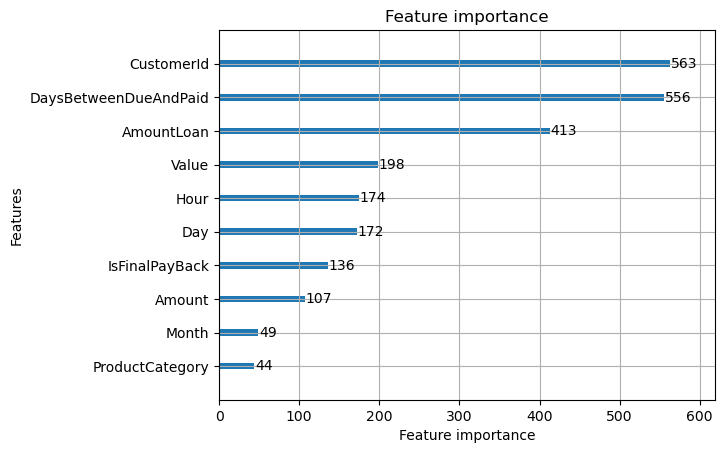

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import early_stopping
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'filtered_data' is your cleaned dataset with 'IsDefaulted' as the target variable
categorical_columns = ['CustomerId', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStatus', 'CurrencyCode']

# Convert Currency to categorical using Label Encoder
le = LabelEncoder()
filtered_data['Currency'] = le.fit_transform(filtered_data['Currency'].astype(str))  # Ensure all entries are strings

# Apply label encoding to other categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    filtered_data[col] = le.fit_transform(filtered_data[col].astype(str))  # Ensure all categorical columns are encoded as integers
    label_encoders[col] = le  # Save the encoder for future use

# Option 1: Converting date columns to numerical format
# Convert the 'PaidOnDate' and 'DueDate' to datetime
filtered_data['PaidOnDate'] = pd.to_datetime(filtered_data['PaidOnDate'], errors='coerce')
filtered_data['DueDate'] = pd.to_datetime(filtered_data['DueDate'], errors='coerce')

# Create new feature by calculating the number of days between PaidOnDate and DueDate
filtered_data['DaysBetweenDueAndPaid'] = (filtered_data['PaidOnDate'] - filtered_data['DueDate']).dt.days

# Drop the original date columns
filtered_data = filtered_data.drop(columns=['PaidOnDate', 'DueDate'])

# Option 2 (Alternative): If you prefer to drop the date columns completely, uncomment the next line
# filtered_data = filtered_data.drop(columns=['PaidOnDate', 'DueDate'])

# Splitting the data into features (X) and target (y)
X = filtered_data.drop(columns=['IsDefaulted'])
y = filtered_data['IsDefaulted']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Using LGBMClassifier with early stopping
clf = lgb.LGBMClassifier(
    objective='binary',
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=1000  # Maximum number of boosting rounds
)

# Train with early stopping
early_stopping_rounds = 10
early_stopping_callback = early_stopping(early_stopping_rounds)

clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # Validation set
    eval_metric='auc',  # AUC as the metric
    callbacks=[early_stopping_callback]
)

# Step 4: Predictions and Evaluation
# Make predictions on the test set
y_pred = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate the model using AUC score
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc_score}")

# Step 5: Feature Importance (Optional)
# Plot feature importance
lgb.plot_importance(clf, max_num_features=10)
plt.show()


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05],
    'num_leaves': [31, 50],
    'max_depth': [-1, 5],
    'min_data_in_leaf': [50]
}


grid_search = GridSearchCV(lgb.LGBMClassifier(n_estimators=1000), param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best AUC score: {grid_search.best_score_}")


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 114, number of negative: 838
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 952, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119748 -> initscore=-1.994820
[LightGBM] [Info] Start training from score -1.994820
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [7]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
print(f"Cross-validated AUC scores: {cv_scores}")
print(f"Mean AUC: {cv_scores.mean()}")


[LightGBM] [Info] Number of positive: 142, number of negative: 1048
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 650
[LightGBM] [Info] Number of data points in the train set: 1190, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119328 -> initscore=-1.998812
[LightGBM] [Info] Start training from score -1.998812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [60]:
pip install shap

   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   -- ------------------------------------- 30.7/456.1 kB ? eta -:--:--
   --- ----------------------------------- 41.0/456.1 kB 487.6 kB/s eta 0:00:01
   ----- --------------------------------- 61.4/456.1 kB 465.5 kB/s eta 0:00:01
   ------- ------------------------------- 81.9/456.1 kB 459.5 kB/s eta 0:00:01
   ---------- --------------------------- 122.9/456.1 kB 554.9 kB/s eta 0:00:01
   ----------- -------------------------- 133.1/456.1 kB 491.5 kB/s eta 0:00:01
   ------------ ------------------------- 153.6/456.1 kB 482.7 kB/s eta 0:00:01
   --------------- ---------------------- 184.3/456.1 kB 483.6 kB/s eta 0:00:01
   ----------------- -------------------- 204.8/456.1 kB 497.6 kB/s eta 0:00:01
   ------------------- ------------------ 235.5/456.1 kB 514.3 kB/s eta 0:00:01
   --------------------- ---------------- 256.0/456.1 kB 506.7 kB/s eta 0:00:01
   ---------------------- --------------- 266.2/456.1 kB 


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\rnsma\anaconda3\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


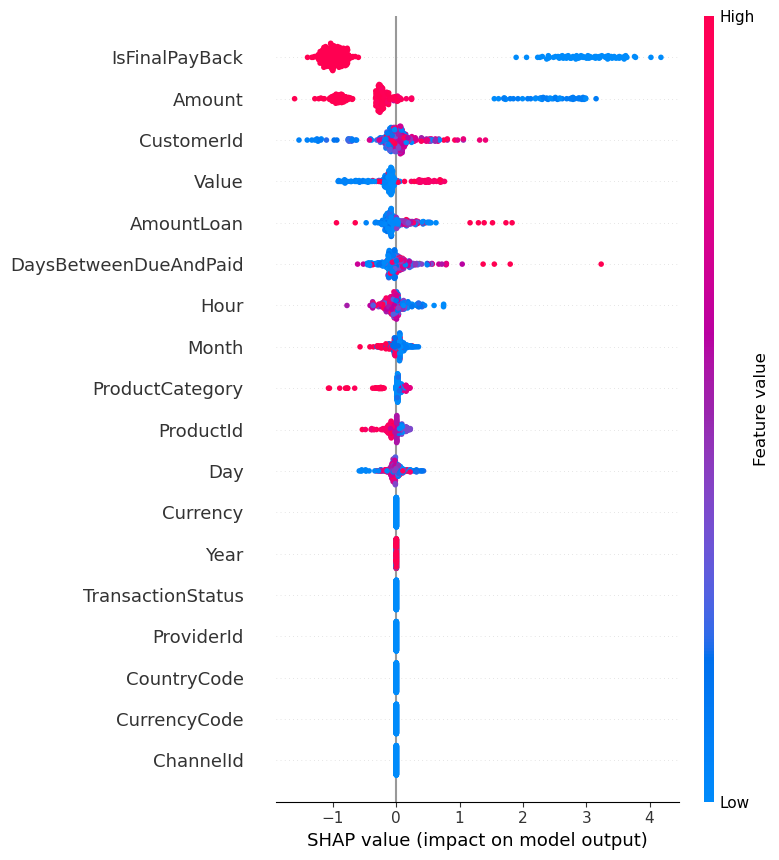

In [8]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


[LightGBM] [Info] Number of positive: 142, number of negative: 1048
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2282
[LightGBM] [Info] Number of data points in the train set: 1190, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119328 -> initscore=-1.998812
[LightGBM] [Info] Start training from score -1.998812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

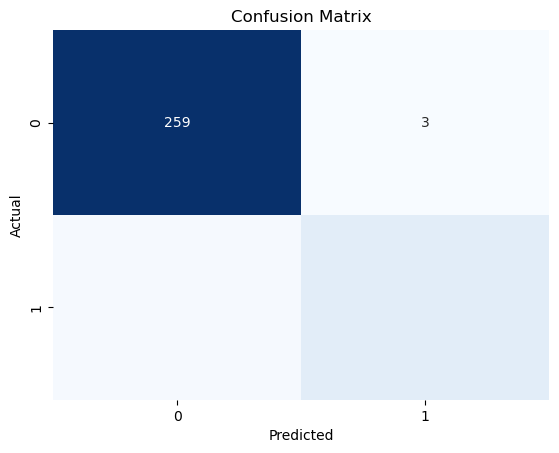

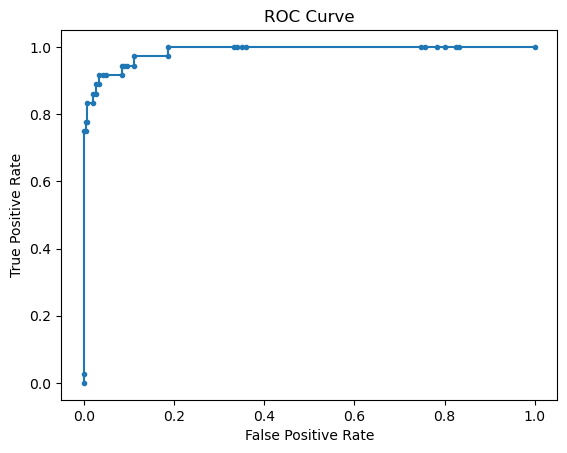

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assume 'data' is your DataFrame
# Step 0: Check and handle NaN values in the target column
data = data.dropna(subset=['IsDefaulted'])  # Drop rows where target is NaN

# Step 1: Handle categorical columns using LabelEncoder
label_encoders = {}
categorical_columns = ['CustomerId', 'TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode',
                       'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'LoanId', 'InvestorId',
                       'LoanApplicationId', 'PayBackId', 'ThirdPartyId', 'Currency']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Convert all values to string before encoding
    label_encoders[col] = le  # Save the encoders for future use

# Step 2: Splitting the data into features (X) and target (y)
# Replace 'IsDefaulted' with your actual target column name
X = data.drop(columns='IsDefaulted')  # Features
y = data['IsDefaulted']               # Target variable

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the LightGBM model
train_data = lgb.Dataset(X_train, label=y_train)
params = {'learning_rate': 0.05, 'max_depth': -1, 'num_leaves': 31, 'objective': 'binary', 'metric': 'auc'}

# Train the model
model = lgb.train(params, train_data, num_boost_round=100)

# Step 5: Make predictions on the test set
y_pred_prob = model.predict(X_test)  # Probabilities
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convert probabilities to binary output (0 or 1)

# Step 6: Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# AUC score
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report (Precision, Recall, F1-Score)
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Step 7: Optional: Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optional: Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [20]:
import joblib

# Assuming your model is stored in a variable called 'model'
joblib.dump(model, 'final_model.pkl')


['final_model.pkl']

In [21]:
# Load the saved model
loaded_model = joblib.load('final_model.pkl')

# Use the loaded model to make predictions on the test data
y_pred = loaded_model.predict(X_test)  # Replace X_test with your actual test data
